<h1>Will I get delayed on my way to work?</h1>
<h2>A WMATA Analysis from August 13th through September 8th. </h2>

In [1]:
#import packages
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
#read in wmata twitter data
wmata = pd.read_csv("wmata_info.csv")
# some delay alerts say 'No Longer Delayed' so add a flag
# add a morning or afternoon flag
wmata['cleanTime'] = pd.to_datetime(wmata['DateUpdated'],format='%Y-%m-%dT%H:%M:%S')
wmata['timeFlag'] = ['Morning' if t.hour < 12 else 'Evening' for t in wmata['cleanTime']]
print(wmata.shape, list(wmata))

delays = wmata[[True if inc == "Delay" else False for inc in wmata['IncidentType']]]
print(delays.shape)

(37, 12) ['DateUpdated', 'DelaySeverity', 'Description', 'EmergencyText', 'EndLocationFullName', 'IncidentID', 'IncidentType', 'LinesAffected', 'PassengerDelay', 'StartLocationFullName', 'cleanTime', 'timeFlag']
(29, 12)


In [3]:
#describe min and max date for analysis dates
#decribe frequency of lines affected
print(min(delays['DateUpdated']), max(delays['DateUpdated']))

2017-08-13T18:44:12 2017-09-08T09:05:13


In [4]:
lines = delays['LinesAffected'].str.get_dummies(sep=';')
delays2 = pd.concat([delays, lines], axis=1)
print(lines.apply(sum, axis=0))
delays2.head(5)

BL     7
GR    11
OR     9
RD     3
SV    10
YL     1
dtype: int64


,DateUpdated,DelaySeverity,Description,EmergencyText,EndLocationFullName,IncidentID,IncidentType,LinesAffected,PassengerDelay,StartLocationFullName,cleanTime,timeFlag,BL,GR,OR,RD,SV,YL
2,2017-08-13T18:44:12,NaN,Red Line: Expect residual delays to Shady Grov...,NaN,NaN,DB6D8C85-672E-47E0-AACE-5A0B36466225,Delay,RD;,0,NaN,2017-08-13 18:44:12,Evening,0,0,0,1,0,0
7,2017-08-21T16:40:31,NaN,Blue/Yellow Line: Expect delays in both direct...,NaN,NaN,4974ACE4-DF8C-40B2-91FB-8B642A844F9A,Delay,BL;YL;,0,NaN,2017-08-21 16:40:31,Evening,1,0,0,0,0,1
8,2017-08-23T07:50:47,NaN,Silver Line: Expect delays to Wiehle-Reston Ea...,NaN,NaN,DCB6A7F1-4024-4ED3-B1CC-3EEBB47919D5,Delay,SV;,0,NaN,2017-08-23 07:50:47,Morning,0,0,0,0,1,0
9,2017-08-23T08:02:59,NaN,Silver Line: Expect residual delays to Wiehle-...,NaN,NaN,019815F4-BF0F-4932-9FB0-41F470FB1E32,Delay,SV;,0,NaN,2017-08-23 08:02:59,Morning,0,0,0,0,1,0
10,2017-08-23T08:12:04,NaN,Silver Line: Normal service has resumed at Ea...,NaN,NaN,9675DC49-3EA9-4FE5-B8D6-79D616CDAEED,Delay,SV;,0,NaN,2017-08-23 08:12:04,Morning,0,0,0,0,1,0


In [5]:
#look at green line
for d in delays2.loc[[True if d == 1 else False for d in delays2['GR']],'Description']:
    print(d)
    print('*'*10)

Green Line: Expect residual delays to Greenbelt due to an earlier police investigation at Suitland.
**********
Green Line: Single tracking btwn Navy Yard & L'Enfant Plaza due to a police investigation at Waterfront. Expect delays in both directions.
**********
Green Line: No longer single tracking. Expect residual delays in both directions due to an earlier police investigation at Waterfront.
**********
Green Line: Trains are single tracking btwn Greenbelt & College Park due to a disabled train outside Greenbelt. Delays in both directions.
**********
Green Line: No longer single tracking. Residual delays continue in both directions due to an earlier train malfunction outside Greenbelt.
**********
Green Line: Delays possible in both directions due to post-baseball game travel at Navy Yard station.
**********
Green Line: Expect residual delays to Branch Avenue due to an earlier train malfunction at PG Plaza.
**********
Green Line: Expect delays to Greenbelt due to a disabled train at Wat

<h2>Analyze Twitter Data

In [6]:
tweets = pd.read_csv("tweets_cleaned2.csv",encoding='utf-8')
tweets['created'] = pd.to_datetime(tweets['created_at'])
tweets.head(5)

,id,created_at,text,favorite_count,retweet_count,created,cleaned_tweet,is_rt,is_angry,is_delay,is_ok,is_irrelevant,tweet_score,unhappy_score
0,900860502603071488,Thu Aug 24 23:20:55 +0000 2017,@MetroRailInfo Red line car 3219 is a #wmata #...,0,0,2017-08-24 23:20:55,red line car is a #wmata #hotcar ht . report...,False,True,False,False,False,0.0000,2
1,900858302606827520,Thu Aug 24 23:12:11 +0000 2017,@Astronomeous @unsuckdcmetro @alliehilda @Metr...,0,0,2017-08-24 23:12:11,i honestly thought that told me to?,False,True,False,False,False,0.4588,2
2,900857884220821509,Thu Aug 24 23:10:31 +0000 2017,"@unsuckdcmetro @alliehilda @Metrorailinfo Oh, ...",0,0,2017-08-24 23:10:31,"oh, wait you mean a tax? i am ok with that....",False,True,True,False,False,0.3736,2
3,900855339385581569,Thu Aug 24 23:00:24 +0000 2017,@unsuckdcmetro @Randimations @alliehilda @Metr...,1,0,2017-08-24 23:00:24,"not just us, doc... s sc peeps, montana, i...",False,True,False,False,False,0.3612,2
4,900853944800481280,Thu Aug 24 22:54:52 +0000 2017,RT @MetroHotCars: @MetroRailInfo Car 2043 is a...,0,1,2017-08-24 22:54:52,rt : car is a #wmata #hotcar ht . reported x...,False,True,False,False,False,0.0000,2


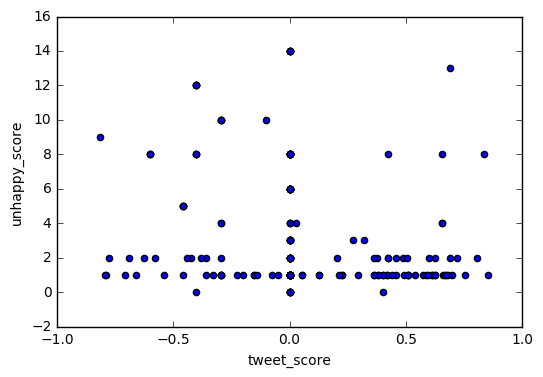

In [7]:
tweets[[True if t==False else False for t in tweets['is_rt']]].plot(x='tweet_score',y='unhappy_score',kind='scatter')

In [8]:
#let's look at positive tweet scores but higher unhappy score
def cut_offs(unhappy, tweet):
    b1, b2 = tweets['unhappy_score']>unhappy , tweets['tweet_score']>tweet
    for t in tweets.loc[b1 & b2, 'text']:
        print(t)

In [9]:
cut_offs(10, 0.5)
cut_offs(5, 0)

Hey @Metrorailinfo, this time, does "police activity" mean shooting like at Col. Hts. Friday? Asking for a friend. #wmata
@Metrorailinfo So you expect a passenger to wait at a locked gate for 18 minutes past opening time just hoping the? https://t.co/NlKqPyssWr
@Metrorailinfo Well, yes. Delays of 10+ min are a good reason to alert customers of speed restrictions, even if they might vary.
Hey @Metrorailinfo, this time, does "police activity" mean shooting like at Col. Hts. Friday? Asking for a friend. #wmata
#WMATA, BE BETTER. Raining (* ?) inside #Braddock shelter as it has been for MONTHS. @Metrorailinfo cc:? https://t.co/VyG2HqAiwx


In [10]:
for d in delays.loc[[16, 17], 'Description']:
    print(d)

Green Line: Single tracking btwn Navy Yard & L'Enfant Plaza due to a police investigation at Waterfront. Expect delays in both directions.
Green Line: No longer single tracking. Expect residual delays in both directions due to an earlier police investigation at Waterfront.


<h3>The new goal is to flag similar time frames and get closest alert to WMATA analysis 

In [11]:
from datetime import timedelta
#time_difference = a - b
#time_difference_in_minutes = time_difference / timedelta(minutes=1)


In [12]:
def combine_wmata_data(twitter, wmata_data):
    wmata_delay = []
    for i in range(twitter.shape[0]):
        day = twitter.loc[i, 'created']
        tweet_day = twitter.loc[i,'created'].day
        day_boolean = [True if t.day==tweet_day else False for t in wmata_data['cleanTime']]
        wmata_sub = wmata_data[day_boolean]
        if wmata_sub.shape[0] == 0:
            wmata_delay.append('')
        else:
            time_differences = [(day - t)/timedelta(minutes=1) for t in wmata_sub['cleanTime']]
            if any(abs(t)<=30 for t in time_differences):
                index = [abs(t)<=30 for t in time_differences]
                incidents = list(wmata_sub.loc[index, 'IncidentID'])
                wmata_delay.append(incidents)
            else:
                wmata_delay.append('')
    return(wmata_delay)


In [13]:
tweets.index = range(tweets.shape[0])
incidents = combine_wmata_data(tweets, delays2)
new_tweets = tweets.assign(incidentID=incidents)
sum([1 if t != '' else 0 for t in incidents]) #only 8 matches

8

In [14]:
twitter_look = new_tweets[new_tweets['incidentID'] != '' ]
twitter_look.index = range(twitter_look.shape[0])
for i in range(twitter_look.shape[0]):
    print(twitter_look.loc[i, 'text'])
    if len(twitter_look.loc[i, 'incidentID'])==1:
        val = twitter_look.loc[i, 'incidentID'][0]
        print(list(delays2.loc[delays2['IncidentID']==val,'Description']))
    else:
        for ids in (twitter_look.loc[i, 'incidentID']):
                    vals = twitter_look.loc[i, 'incidentID']
                    print(list(delays2.loc[delays2['IncidentID']==val,'Description']))
    print('****')
# most posts are not really related to the wmata api

@tylerkraus @unsuckdcmetro @wmata @Metrorailinfo @nihilist_arbys I think I'd take my luck with Metro before Arby's.
['Red Line: Expect residual delays to Shady Grove due to an earlier train malfunction at Bethesda.']
****
@Metrorailinfo Well, yes. Delays of 10+ min are a good reason to alert customers of speed restrictions, even if they might vary.
['Red Line: Expect residual delays to Shady Grove due to an earlier train malfunction at Bethesda.']
['Red Line: Expect residual delays to Shady Grove due to an earlier train malfunction at Bethesda.']
****
@Metrorailinfo Then why aren't you conveying this to riders? It affects people's ability to make bus connections and be on time in general.
['Green Line: Expect residual delays to Greenbelt due to an earlier police investigation at Suitland.']
****
RT @Metrorailinfo: Org/Slv Line: Trains single tracking btwn Foggy Bottom &amp; Clarendon due to track problem outside Rosslyn. Expect delays i?
['Green Line: No longer single tracking. Expect 